In [19]:
import sqlite3
import pandas as pd
import numpy as np
import re
from tqdm import trange 

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/sundooedu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
conn = sqlite3.connect("db.sqlite3")
cur = conn.cursor()
cur.execute("SELECT * FROM modeling")
rows = cur.fetchall()

In [4]:
cols = [column[0] for column in cur.description]
data_df = pd.DataFrame.from_records(data=rows, columns=cols)
conn.close()

In [5]:
data_df

,category,product,title,rank
0,50000145,닭가슴살,마이닭 닭가슴살 58종 전상품 골라담기,"N=a:lst*A.title,i:81238778644,r:8"
1,50000145,닭가슴살,[맛있닭] 닭가슴살스테이크 외 31종 골라담기,"N=a:lst*A.title,i:10463949223,r:1"
2,50000145,닭가슴살,10+1 마이닭 닭가슴살 전상품 골라담기,"N=a:lst*A.title,i:81465025241,r:20"
3,50000145,닭가슴살,[잇메이트] 훈제 닭가슴살 7종 1팩 골라담기,"N=a:lst*A.title,i:11216830028,r:7"
4,50000145,닭가슴살,허닭 닭가슴살 35종 골라담기 70g/100g/120g,"N=a:lst*N.title,i:7887607690,r:1"
...,...,...,...,...
69297,50000026,고래사어묵,[eTV]고래사 어묵 10종세트((간식용 4종+반찬용 5종)+소스),"N=a:lst*N.title,i:23309967546,r:155"
69298,50000026,고래사어묵,"진달래(매화 란 160g) 5개 매화오뎅,청실홍실,매화어묵,찐어묵 고래사어묵용궁치즈...","N=a:lst*N.title,i:82556023474,r:156"
69299,50000026,고래사어묵,[돌아와요 부산어묵] [돌아와요 부산어묵] by 고래사 8팩세트 (1팩 추가증정+소...,"N=a:lst*N.title,i:20850125477,r:157"
69300,50000026,고래사어묵,코스트코/고래사 전통 꼬치어묵 840g/20입-고래사 전통꼬치어묵 840g,"N=a:lst*N.title,i:22512383893,r:158"


## title 문자 전처리

In [8]:
def clean_str(text):
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

In [12]:
a = data_df.title.tolist()

In [16]:
cleaning = []
for i in trange(len(a)):
    cleaning.append(clean_str(a[i]))

100%|██████████| 69302/69302 [00:00<00:00, 439338.25it/s]


In [20]:
stop_words = ['아무렇게나', '다', '게', '예컨대', '로', '나','도', '+']

word_tokens = []
for i in trange(len(cleaning)):
    word_tokens.append(word_tokenize(cleaning[i]))

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w)      

100%|██████████| 69302/69302 [00:00<00:00, 2418250.05it/s]


['마이닭',
 '닭가슴살',
 '58종',
 '전상품',
 '골라담기',
 '맛있닭',
 '닭가슴살스테이크',
 '외',
 '31종',
 '골라담기',
 '101',
 '마이닭',
 '닭가슴살',
 '전상품',
 '골라담기',
 '잇메이트',
 '훈제',
 '닭가슴살',
 '7종',
 '1팩',
 '골라담기',
 '허닭',
 '닭가슴살',
 '35종',
 '골라담기',
 '70g100g120g',
 '오다닭',
 '국내산',
 '냉동',
 '생닭가슴살',
 '10kg',
 '1kg',
 '10팩',
 '바디나인',
 '닭가슴살',
 '11',
 '골라담기',
 '63종전제품',
 '슬릭마켓',
 '한끼볼',
 '5종',
 '닭가슴살볼',
 '10팩',
 '햇살닭',
 '닭가슴살',
 '10팩',
 '스테이크한입',
 '아임닭',
 '닭가슴살',
 '소시지',
 '만두',
 '외',
 '60종',
 '골라담기',
 '맛있닭',
 '닭가슴살',
 '67종',
 '1팩',
 '모음',
 '훈제',
 '스테이크',
 '스팀',
 '헬스',
 '닭가슴살',
 '그릴',
 '100g',
 '소소칩',
 '닭가슴살칩',
 '단백질',
 '과자',
 '간식',
 '꿈앤닭',
 '훈제',
 '닭가슴살',
 '스테이크',
 '볼',
 '큐브100g',
 '굽네',
 '닭가슴살',
 '43종',
 '골라담기',
 '햇살닭',
 '저염훈제닭가슴살',
 '5kg',
 '200gX25팩',
 '맛있닭',
 '닭가슴살',
 '32종',
 '골라담기스테이크',
 '훈제',
 '이훈의',
 '건강한',
 '세상',
 '바로먹닭',
 '닭가슴살',
 '스테이크',
 '갈비맛',
 '1kg',
 '10팩',
 '미스터',
 '닭가슴살',
 '9종',
 '골라담기',
 '신선애',
 '냉동',
 '생',
 '닭가슴살',
 '10kg',
 '200g',
 'X',
 '50팩',
 '미쳤닭',
 '구이',
 '닭가슴살',
 '마늘맛',
 '10kg',
 '200gX50팩',
 '훈제',
 '마이닭

In [22]:
data_df['title'] = result
data_df['title']

0                              [마이닭, 닭가슴살, 58종, 전상품, 골라담기]
1                            [맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]
2                              [101, 마이닭, 닭가슴살, 전상품, 골라담기]
3                           [잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]
4                       [허닭, 닭가슴살, 35종, 골라담기, 70g100g120g]
                               ...                        
69297                  [eTV고래사, 어묵, 10종세트간식용, 4종반찬용, 5종소스]
69298    [진달래매화, 란, 160g, 5개, 매화오뎅청실홍실매화어묵찐어묵, 고래사어묵용궁치...
69299    [돌아와요, 부산어묵, 돌아와요, 부산어묵, by, 고래사, 8팩세트, 1팩, 추가...
69300        [코스트코고래사, 전통, 꼬치어묵, 840g20입고래사, 전통꼬치어묵, 840g]
69301    [특각보람, 800gX15사각어묵고래사, 사각, 어묵tlrekddydtkrkr, d...
Name: title, Length: 69302, dtype: object

## rank 추출

In [44]:
(data_df['rank'].str.split(',',2))

0          [N=a:lst*A.title, i:81238778644, r:8]
1          [N=a:lst*A.title, i:10463949223, r:1]
2         [N=a:lst*A.title, i:81465025241, r:20]
3          [N=a:lst*A.title, i:11216830028, r:7]
4           [N=a:lst*N.title, i:7887607690, r:1]
                          ...                   
69297    [N=a:lst*N.title, i:23309967546, r:155]
69298    [N=a:lst*N.title, i:82556023474, r:156]
69299    [N=a:lst*N.title, i:20850125477, r:157]
69300    [N=a:lst*N.title, i:22512383893, r:158]
69301    [N=a:lst*N.title, i:82530259455, r:159]
Name: rank, Length: 69302, dtype: object

In [52]:
ranking = []

for i in splitlst:
     ranking.append((i[2].split(':',1)[1]))

ranking

['8',
 '1',
 '20',
 '7',
 '1',
 '43',
 '19',
 '3',
 '26',
 '6',
 '33',
 '23',
 '37',
 '18',
 '11',
 '42',
 '130',
 '64',
 '58',
 '16',
 '39',
 '100',
 '75',
 '73',
 '21',
 '70',
 '51',
 '54',
 '55',
 '26',
 '156',
 '56',
 '150',
 '60',
 '31',
 '50',
 '81',
 '71',
 '57',
 '36',
 '117',
 '78',
 '138',
 '99',
 '41',
 '87',
 '86',
 '52',
 '88',
 '46',
 '51',
 '52',
 '53',
 '54',
 '55',
 '115',
 '84',
 '101',
 '105',
 '56',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',


In [54]:
data_df['rank'] = ranking
data_df['rank']

0          8
1          1
2         20
3          7
4          1
        ... 
69297    155
69298    156
69299    157
69300    158
69301    159
Name: rank, Length: 69302, dtype: object

## EDA

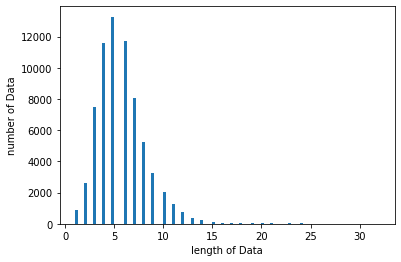

In [62]:
# 상품 제목의 단어 길이 분포

plt.hist([len(s) for s in data_df['title']], bins = 100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

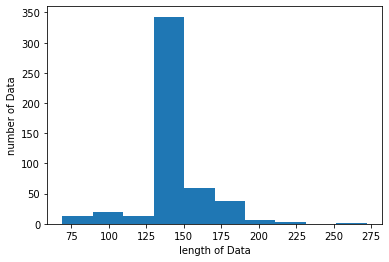

In [70]:
# 상품 랭킹 분포

plt.hist(data_df['rank'].value_counts())
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [69]:
data_df['rank'].value_counts()

1     272
11    221
6     216
21    212
26    199
     ... 
10     80
9      75
4      75
5      71
15     69
Name: rank, Length: 495, dtype: int64